In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.lines as mlines

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_df,city_df, on = 'city', how = 'outer')
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

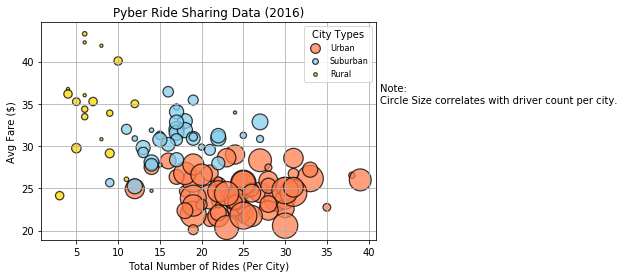

In [2]:
# Obtain the x and y coordinates for each of the three city types
combined_city = combined_df.groupby(['type','city'])
fare = combined_city['fare'].mean()
rides = combined_city['ride_id'].count()
drivers = combined_city['driver_count'].mean()
fare_rides = pd.DataFrame({
    'Avg Fare ($)':fare,
    'Total Number of Rides (Per City)':rides,
    'Driver Count':drivers
})

UrbanData = fare_rides.loc['Urban']
SuburbanData = fare_rides.loc['Suburban']
RuralData = fare_rides.loc['Rural']

ax = plt.gca()

fare_rides.loc['Urban'].plot(kind = 'scatter', label = 'Urban', x = 'Total Number of Rides (Per City)',edgecolor = 'black',
y = 'Avg Fare ($)',alpha = .75,linewidths =1.25,color = 'Coral', s = UrbanData['Driver Count']*10, grid = True,title = "Pyber Ride Sharing Data (2016)", ax=ax)

fare_rides.loc['Suburban'].plot(kind = 'scatter', label = 'Suburban', x='Total Number of Rides (Per City)',edgecolor = 'black',
y = 'Avg Fare ($)',alpha = .75, linewidths =1.25,color = 'SkyBlue',s = SuburbanData['Driver Count']*10, grid = True, title = "Pyber Ride Sharing Data (2016)",ax=ax)

fare_rides.loc['Rural'].plot(kind = 'scatter', label = 'Rural', x = 'Total Number of Rides (Per City)',edgecolor = 'black',
y = 'Avg Fare ($)',alpha = .75, linewidths =1.25,color = 'Gold', s = RuralData['Driver Count']*10, grid = True, title = "Pyber Ride Sharing Data (2016)",ax=ax)


# Build the scatter plots for each city types
#urban_g = plt.scatter(UrbanData['Total Number of Rides(per City)'], UrbanData['Avg Fare ($)'], 
           #label = 'Urban',marker ='o', alpha = .75, color = 'orange', s = fare_rides['Driver Count'], edgecolor = 'black')

#suburban_g = plt.scatter(SuburbanData['Total Number of Rides(per City)'], SuburbanData['Avg Fare ($)'], 
            #label = 'Suburban', marker ='o',alpha = .75, color = 'C', s =  fare_rides['Driver Count'], edgecolor = 'black')

#rural_g = plt.scatter(RuralData['Total Number of Rides(per City)'], RuralData['Avg Fare ($)'], 
            #label = 'Rural', marker ='o',alpha = .75, color = 'y', s =  fare_rides['Driver Count'], edgecolor = 'black')

# Incorporate the other graph properties

# Create a legend

plt.legend(loc = 0, title = 'City Types', fontsize =8, markerscale = .5)
# Incorporate a text label regarding circle size

textstr = (f'Note: \nCircle Size correlates with driver count per city.')

plt.gcf().text(.91, .6, textstr, fontsize=10)
#plt.show()

# Save Figure

plt.savefig('Bubble.png',bbox_inches='tight')


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

C:\Users\consi\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


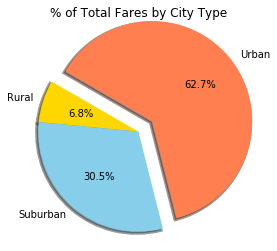

In [4]:
# Calculate Type Percents
types_df = combined_df
types_group = types_df.groupby(['type'])
fare_sum = types_group['fare'].sum()
total_fares = fare_sum.sum()
ride_percent = round(fare_sum/(total_fares)*100,2)
ride_percent_df = pd.DataFrame({
    'Percent Rides':ride_percent
})

labels = ['Rural','Suburban','Urban']
explode = (0,0,0.2)
colors = ['Gold','SkyBlue','Coral']

# Build Pie Chart

ride_percent.plot(kind = 'pie', y= 'ride_percent',explode=explode,labels=labels,colors = colors,shadow = True,
autopct='%.1f%%', startangle = 150, radius =1.15,title = '% of Total Fares by City Type',wedgeprops = {'linewidth': 3})
plt.axes().set_ylabel('')
#plt.show()

# Save Figure

plt.savefig('TotalFares.png',bbox_inches='tight')


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

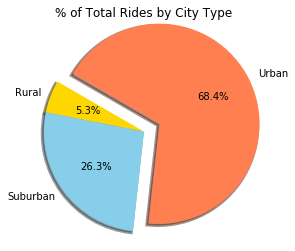

In [6]:
# Calculate Ride Percents

types_df = combined_df
types_group = types_df.groupby(['type'])
rides_count = types_group['ride_id'].count()
total_rides = rides_count.sum()
ride_percent = round(rides_count/(total_rides)*100,2)
ride_percent_df = pd.DataFrame({
    'Percent Rides':ride_percent
})
# Build Pie Chart

labels = ['Rural','Suburban','Urban']
explode = (0,0,0.2)
colors = ['Gold','SkyBlue','Coral']
ride_percent.plot(kind = 'pie', y= 'ride_percent',explode=explode,labels=labels,colors = colors,shadow = True,
autopct='%.1f%%', startangle = 150, radius =1.15,title = '% of Total Rides by City Type',wedgeprops = {'linewidth': 3})
plt.axes().set_ylabel('')
#plt.show()

# Save Figure

plt.savefig('TotalRides.png',bbox_inches='tight')

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

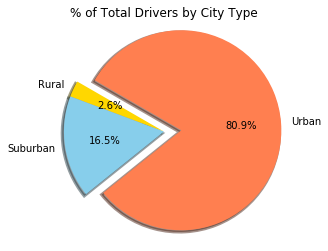

In [8]:
# Calculate Driver Percents

types_df = fare_rides
drivers_group = types_df.groupby(['type'])
drivers_total = drivers_group['Driver Count'].sum()
driverss=drivers
total_drivers = driverss.sum()
ride_percent = round(drivers_total/(total_drivers)*100,2)
ride_percent_df = pd.DataFrame({
    'Percent Rides':ride_percent
})
# Build Pie Charts

labels = ['Rural','Suburban','Urban']
explode = (0,0,0.2)
colors = ['Gold','SkyBlue','Coral']
ride_percent.plot(kind = 'pie', y= 'ride_percent',explode=explode,labels=labels,colors = colors,shadow = True,
autopct='%.1f%%', startangle = 150, radius =1.15,title = '% of Total Drivers by City Type',wedgeprops = {'linewidth': 3})
plt.axes().set_ylabel('')
#plt.show()

# Save Figure

plt.savefig('TotalDrivers.png',bbox_inches='tight')


In [9]:
# Show Figure
plt.show()